In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge, RidgeCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('../Data/萧山房源数据整理版.csv')

In [3]:
data.head()

,小区,价格（万元）,平米单价（元）,建筑面积（平米）,小区域,朝向,装修情况,户型结构,建筑类型,建筑结构,...,产权所属,配备电梯,挂牌时间/秒,上次交易时间/秒,楼层高度,总楼层数,卧室数,客厅数,厨房数,厕所数
0,融信保利创世纪,760.0,85346,89.05,钱江世纪城,南,精装,平层,板楼,钢混结构,...,共有,有,1.610554e+09,1.539187e+09,中,32,3,2,1,2
1,德意中兴广场,225.0,17340,129.76,萧山新城区,南,精装,平层,板楼,钢混结构,...,非共有,有,1.599926e+09,1.216224e+09,中,30,3,2,1,2
2,保利霞飞郡,399.0,47620,83.79,萧山新城区,南,精装,平层,塔楼,钢混结构,...,共有,有,1.610208e+09,1.473437e+09,低,26,3,2,1,1
3,开元广场,410.0,31144,131.65,南部卧城,南,毛坯,平层,板楼,钢混结构,...,非共有,有,1.540310e+09,1.427386e+09,中,19,3,2,1,2
4,北辰国颂府,899.0,52132,172.45,萧山市区,南,精装,平层,板楼,钢混结构,...,非共有,有,1.611245e+09,1.550506e+09,高,26,4,2,1,2


In [4]:
x=data.drop(['价格（万元）','平米单价（元）','挂牌时间/秒','上次交易时间/秒'],axis=1).to_dict(orient='records')
# x=data[['平米单价（元）','建筑面积（平米）']].values
y=data['价格（万元）'].values

In [5]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=46)

In [6]:
# 字典特征提取
transfer_dict = DictVectorizer(sparse=False)
x_train=transfer_dict.fit_transform(x_train)
x_test=transfer_dict.transform(x_test)

In [7]:
# 标准化
transfer_std =  StandardScaler()
x_train=transfer_std.fit_transform(x_train)
x_test=transfer_std.transform(x_test)
# # 低方差特征过滤
# transfer_v = VarianceThreshold(threshold=1)
# x_train=transfer_v.fit_transform(x_train)
# x_test=transfer_v.transform(x_test)
# # 主成分分析
# transfer_PCA = PCA(n_components=0.99) # 为整数就是转为多少个特征  保留的至少都比原特征值少一个
# x_train=transfer_PCA.fit_transform(x_train)
# x_test=transfer_PCA.transform(x_test)

In [8]:
# estimator = Ridge(max_iter=10000, alpha=0.5)
estimator = RidgeCV(alphas=[x for x in range(1,11)])  # 加了交叉验证的岭回归
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
error1 = mean_squared_error(y_test, y_predict)
print("梯度下降_均方误差:", error1)
error2 = mean_absolute_error(y_test, y_predict)
print("梯度下降_平均绝对误差:", error2)
# print("梯度下降_回归权重:", estimator.coef_)

梯度下降_均方误差: 6897.734218315311
梯度下降_平均绝对误差: 48.04438009832957


In [9]:
estimator.score(x_test,y_test)

0.8550503039739853

In [10]:
y_test[0]

370.0

In [11]:
for i in range(len(y_predict)):
    print('预测值：',y_predict[i],'，测试值：',y_test[i],'，误差：',y_predict[i]-y_test[i])

预测值： 383.3354586080755 ，测试值： 370.0 ，误差： 13.335458608075498
预测值： 262.25661419867095 ，测试值： 360.0 ，误差： -97.74338580132905
预测值： 562.229060309095 ，测试值： 570.0 ，误差： -7.770939690905038
预测值： 406.98201685385914 ，测试值： 396.0 ，误差： 10.982016853859136
预测值： 378.17838946604127 ，测试值： 380.0 ，误差： -1.821610533958733
预测值： 477.1680786918673 ，测试值： 516.0 ，误差： -38.83192130813268
预测值： 307.98206856757974 ，测试值： 300.0 ，误差： 7.982068567579745
预测值： 301.34758595903617 ，测试值： 278.0 ，误差： 23.347585959036167
预测值： 552.678136867237 ，测试值： 450.0 ，误差： 102.67813686723696
预测值： 470.3180463250294 ，测试值： 430.0 ，误差： 40.3180463250294
预测值： 320.43243990350555 ，测试值： 330.0 ，误差： -9.567560096494446
预测值： 179.82872043380576 ，测试值： 210.0 ，误差： -30.171279566194244
预测值： 510.5072324629764 ，测试值： 578.0 ，误差： -67.49276753702361
预测值： 679.0242754962885 ，测试值： 660.0 ，误差： 19.02427549628851
预测值： 194.69482017627502 ，测试值： 165.0 ，误差： 29.694820176275016
预测值： 251.9110014186393 ，测试值： 245.0 ，误差： 6.911001418639302
预测值： 223.45489616441972 ，测试值： 265.0 ，误差： -41.545103835

In [12]:
pred=sorted(y_predict)
test=sorted(y_test)
dict_a={}
dict_a['pred']=pred
dict_a['test']=test
df_a=pd.DataFrame(dict_a)

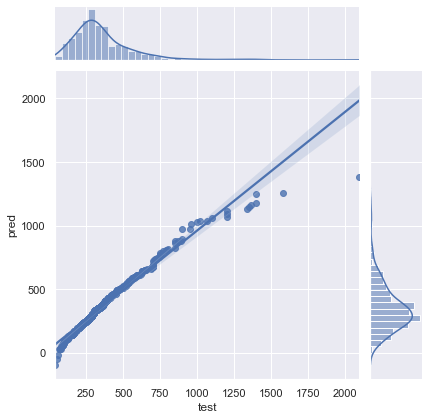

In [15]:
sns.set()
sns.jointplot(x='test',y='pred',kind='reg',data=df_a)

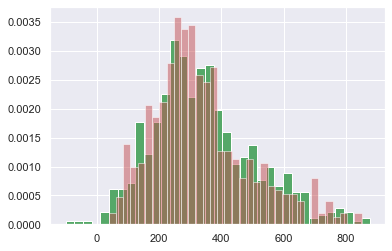

In [16]:
fig = plt.figure(57)
plt.hist(pred[:650],bins=35,histtype='bar',density=True,color='g',alpha=1)
plt.hist(test[:650],bins=35,histtype='bar',density=True,color='r',alpha=0.5)
plt.show()